In [1]:
######################################################################################################
## Etapa 0: Importando as bibliotecas necessárias
######################################################################################################
import os

from concurrent.futures import ThreadPoolExecutor
from src.modules.image import Image
from src.modules.detection import Detection
from src.modules.canny import Canny
from src.modules.adjacency_matrix import AdjacencyMatrix
from src.modules.connected_components import ConnectedComponents, highlight_components
from src.modules.mst import MinimunSpanningTree
from src.modules.build_tree import BuildTree, plot_logest_path
from src.modules.compute_splines import ComputeSplines, plot_splines

In [2]:
def process_image(file_path):
    try:
        # Etapa 1: Leitura da imagem
        img = Image(file_path)
        img.reading_image()


        # Etapa 2: Detecção de características
        detection = Detection(img.gray_image)
        detection.compute_all_detections()


        # Etapa 3: Detecção de bordas
        canny = Canny(detection.mouth, detection.nose, detection.left_eye, detection.right_eye)
        canny.compute_all_edges()


        # # Etapa 4: Criação das matrizes de adjacência
        adjacency_matrix = AdjacencyMatrix(canny.mouth_dict, canny.nose_dict, canny.left_eye_dict, canny.right_eye_dict)
        adjacency_matrix.compute_all_matrices()


        # Etapa 5: Cálculo de componentes conectados para cada matriz
        components_results = ConnectedComponents(adjacency_matrix.nose_adjacency_matrix, adjacency_matrix.mouth_adjacency_matrix, adjacency_matrix.left_eye_adjacency_matrix, adjacency_matrix.right_eye_adjacency_matrix)
        components_results.compute_all_components()
        components_results.compute_main_cc()
        
        # Etapa 6: Cálculo da árvore geradora mínima
        mst = MinimunSpanningTree(components_results.dic_main_nose_cc, components_results.dic_main_mouth_cc, components_results.dic_main_left_eye_cc, components_results.dic_main_right_eye_cc,
                                  adjacency_matrix.nose_adjacency_matrix, adjacency_matrix.mouth_adjacency_matrix, adjacency_matrix.left_eye_adjacency_matrix, adjacency_matrix.right_eye_adjacency_matrix)
        mst.compute_all_mst()
 
        # Etapa 7: Construção da árvore e poda
        tree = BuildTree(mst.min_trees_nose, mst.min_trees_mouth, mst.min_trees_left_eye, mst.min_trees_right_eye)
        tree.compute_all_trees()

        # Etapa 8: Splines
        splines = ComputeSplines(tree.new_longest_path_nose, tree.new_longest_path_mouth, tree.new_longest_path_left_eye, tree.new_longest_path_right_eye,
                                 mst.nodes_nose, mst.nodes_mouth, mst.nodes_left_eye, mst.nodes_right_eye,
                                 canny.nose_dict, canny.mouth_dict, canny.left_eye_dict, canny.right_eye_dict,
                                 mst.idx_nose, mst.idx_mouth, mst.idx_left_eye, mst.idx_right_eye)
        splines.compute_all_splines()

        

        print(f"Processado: {file_path}")
        return img, detection, canny, adjacency_matrix, components_results, mst, tree, splines

    except Exception as e:
        print(f"Erro ao processar {file_path}: {e}")
        return None

    
    
directory = './image'

file_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(('pedro.jpg'))]

with ThreadPoolExecutor(max_workers=5) as executor:
    results = list(executor.map(process_image, file_paths))

Processado: ./image\pedro.jpg


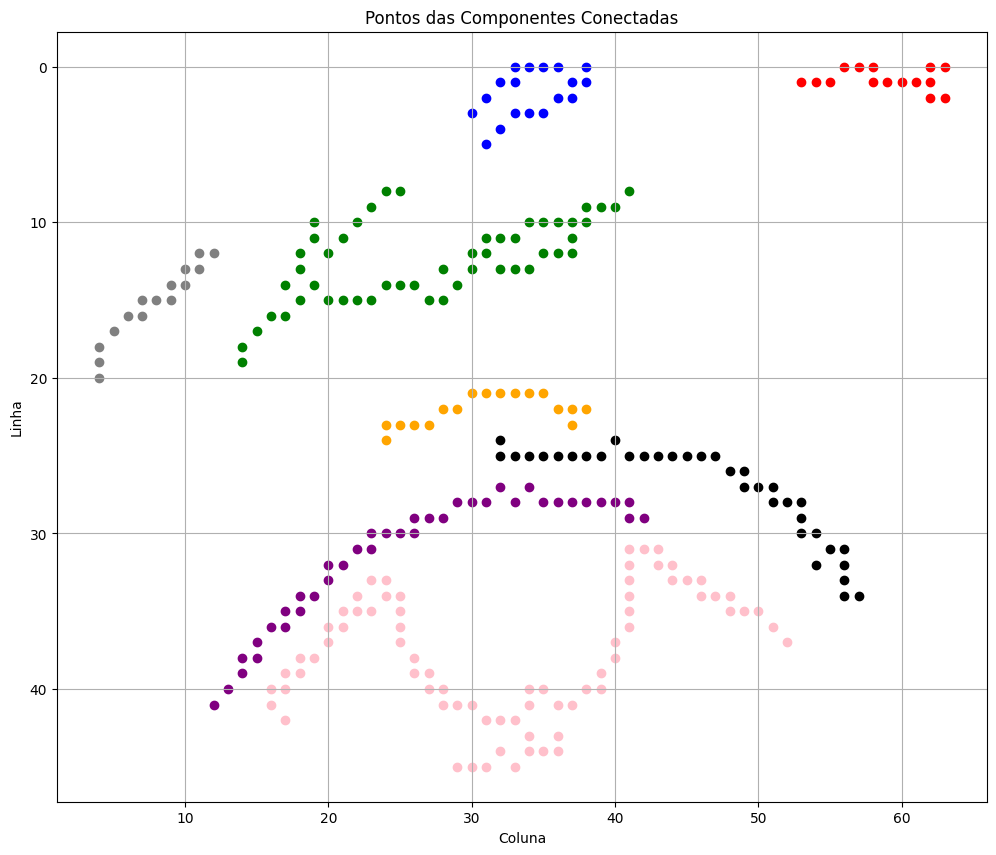

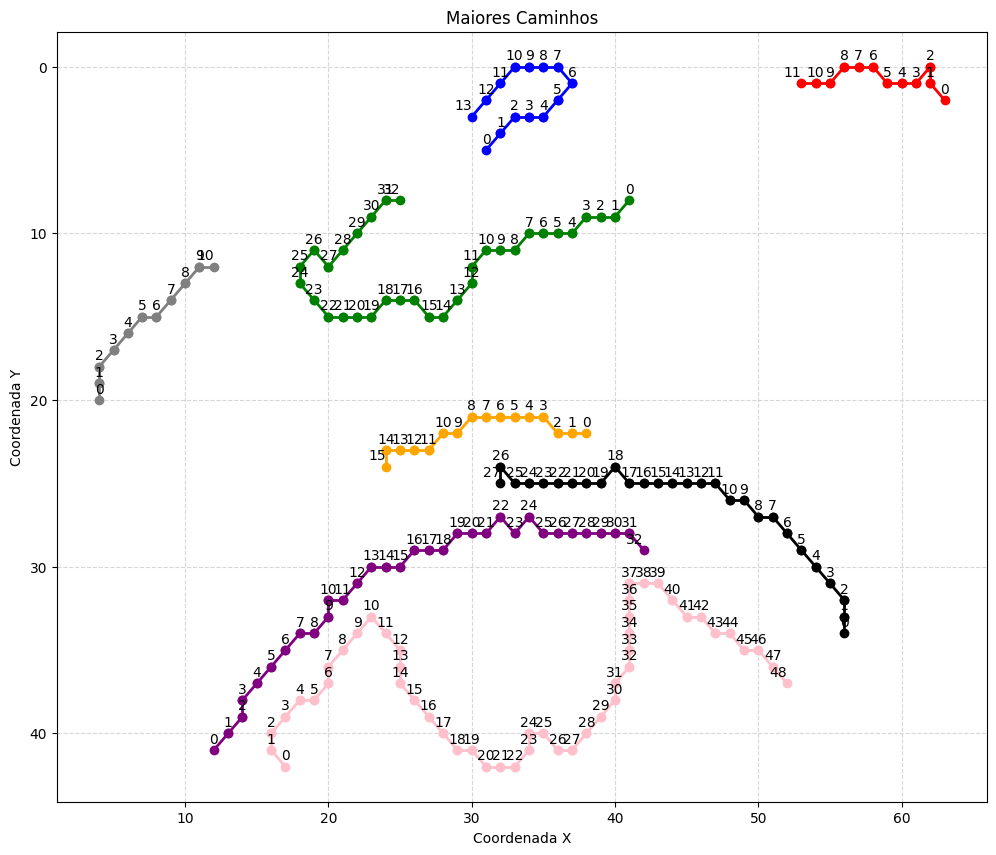

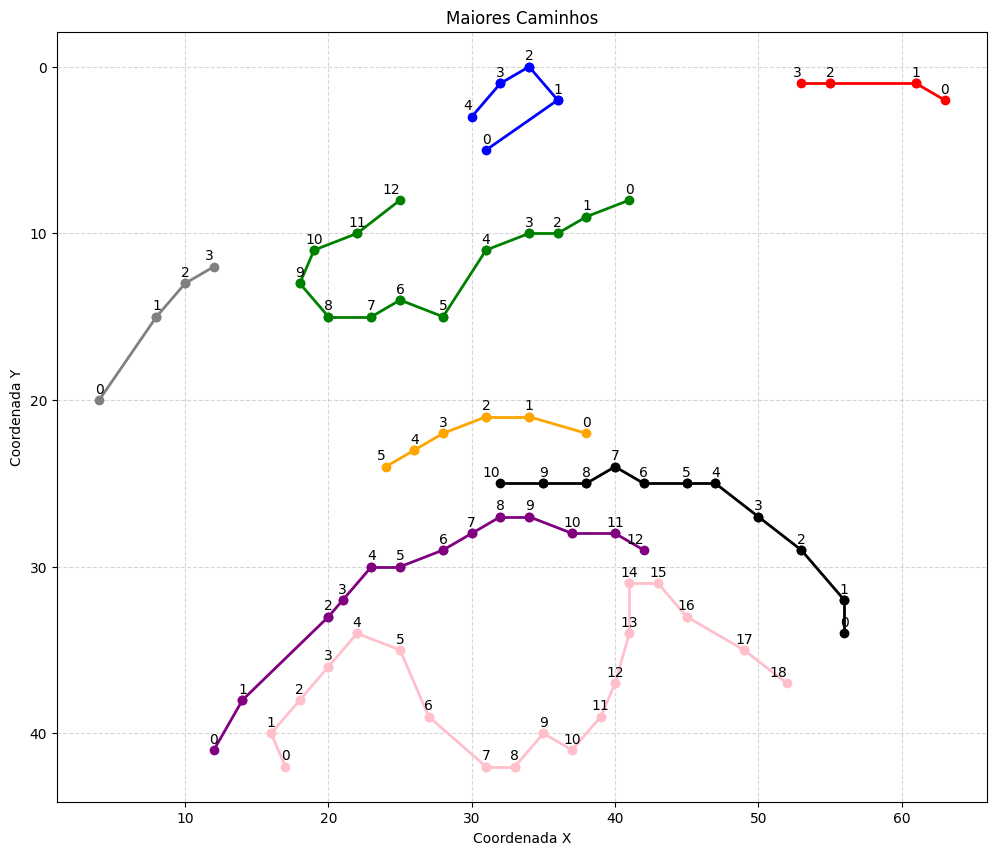

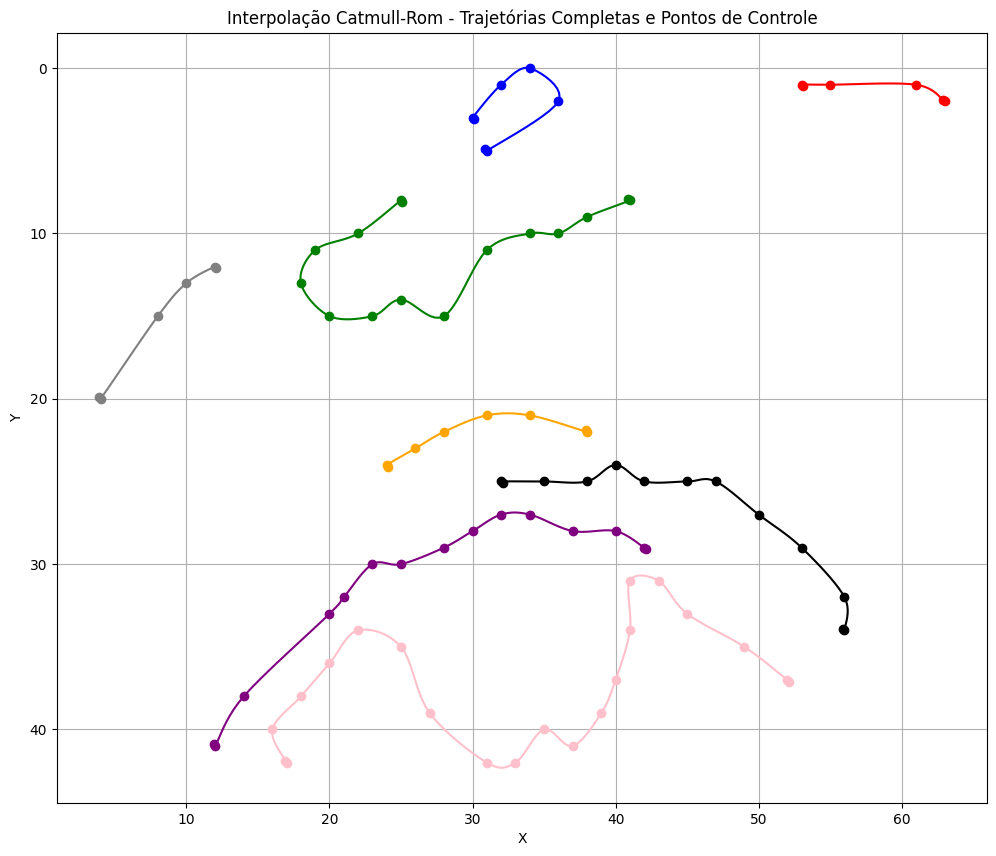

In [4]:
highlight_components(results[0][2].left_eye_dict, results[0][4].dic_main_left_eye_cc)
plot_logest_path(results[0][2].left_eye_dict, results[0][6].longest_path_left_eye, results[0][5].nodes_left_eye)
plot_logest_path(results[0][2].left_eye_dict, results[0][6].new_longest_path_left_eye, results[0][5].nodes_left_eye)
plot_splines(results[0][7].all_X_left_eye, results[0][7].all_Y_left_eye, results[0][7].all_control_x_left_eye, results[0][7].all_control_y_left_eye)


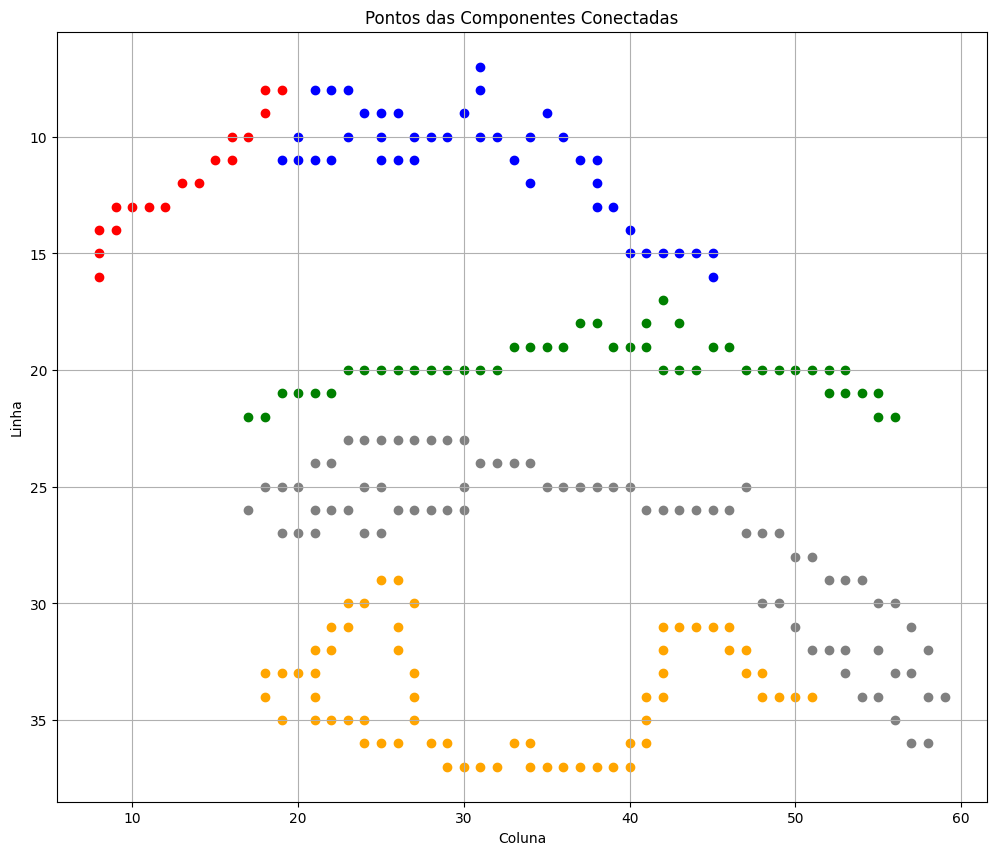

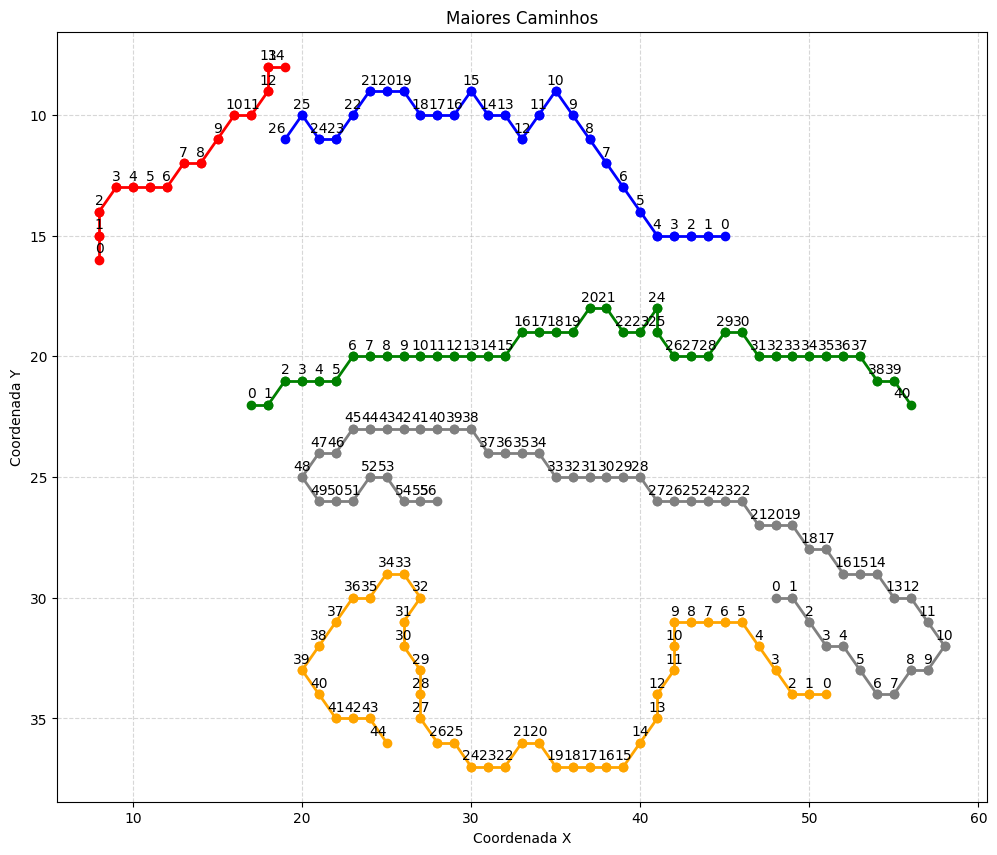

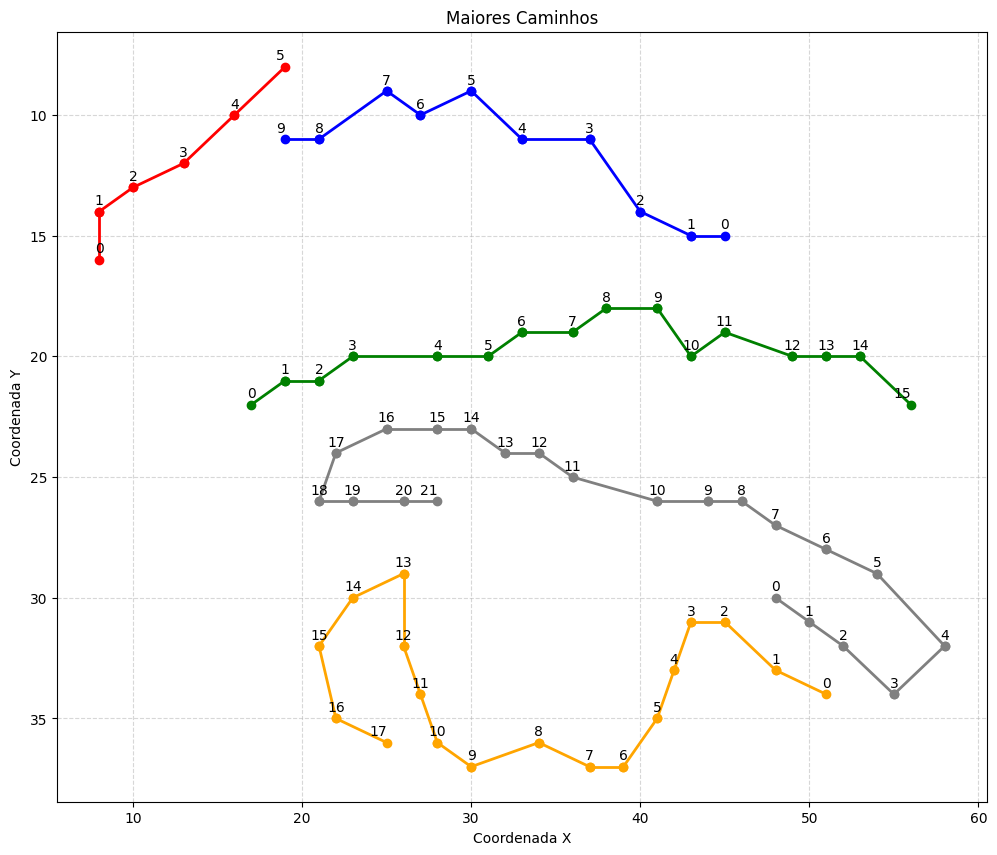

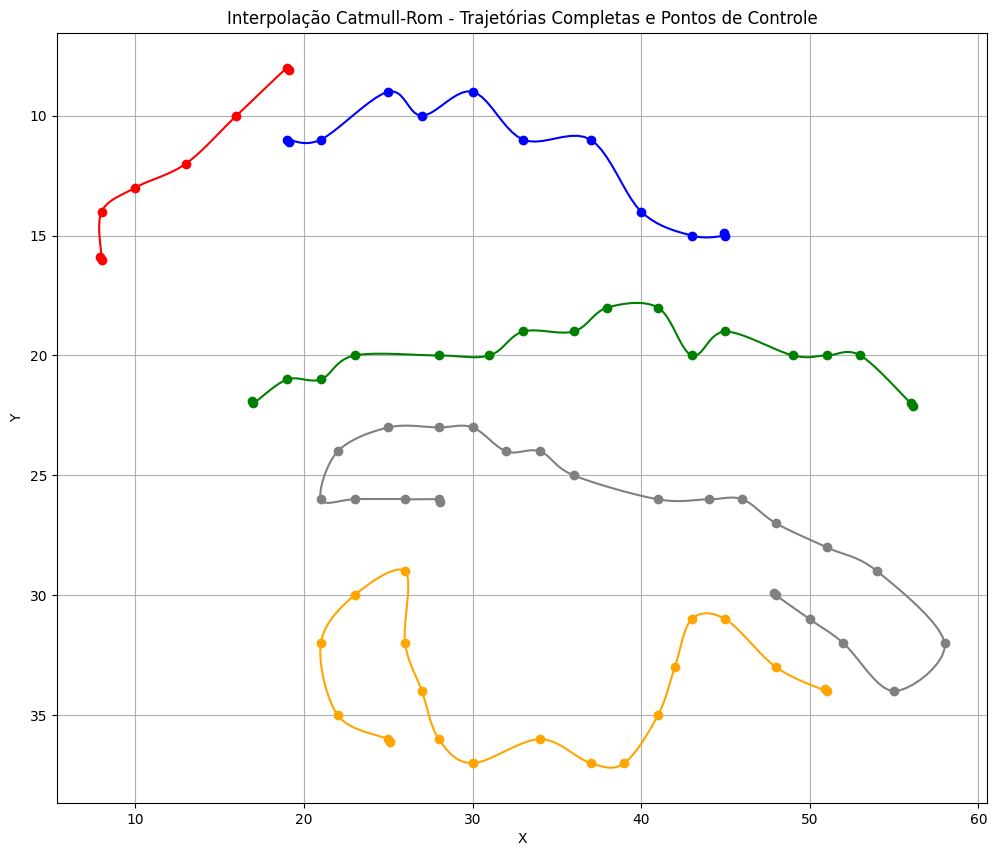

In [5]:
highlight_components(results[0][2].right_eye_dict, results[0][4].dic_main_right_eye_cc)
plot_logest_path(results[0][2].right_eye_dict, results[0][6].longest_path_right_eye, results[0][5].nodes_right_eye)
plot_logest_path(results[0][2].right_eye_dict, results[0][6].new_longest_path_right_eye, results[0][5].nodes_right_eye)
plot_splines(results[0][7].all_X_right_eye, results[0][7].all_Y_right_eye, results[0][7].all_control_x_right_eye, results[0][7].all_control_y_right_eye)


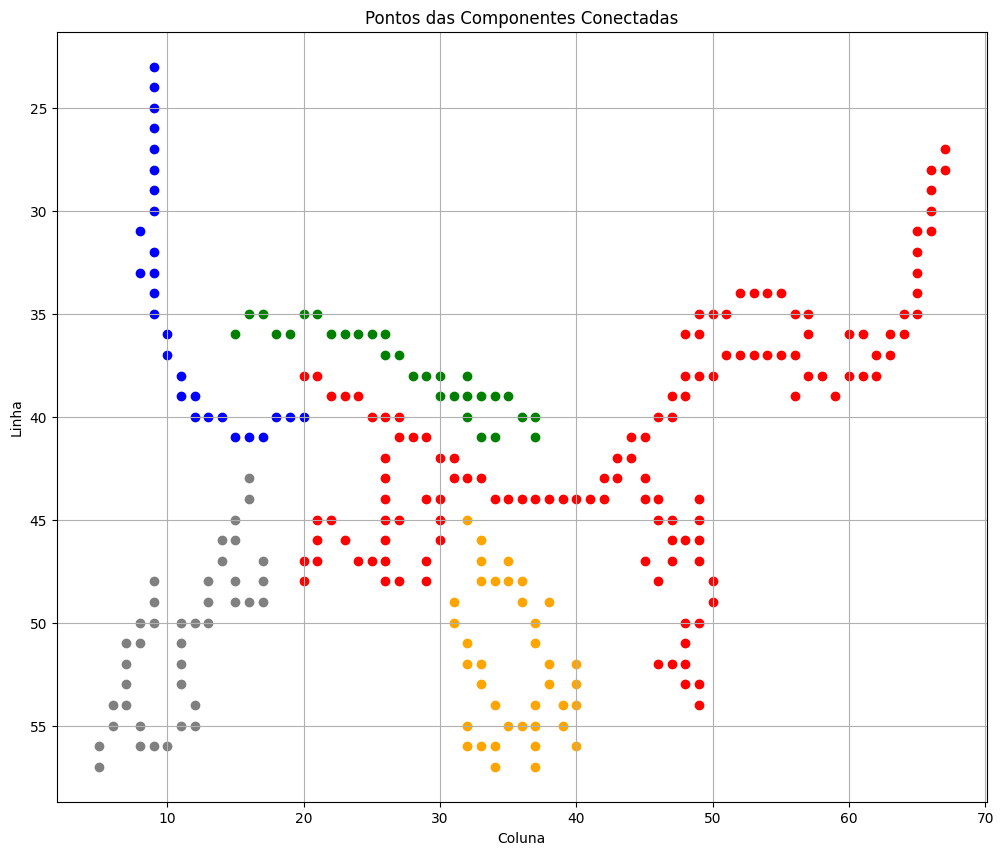

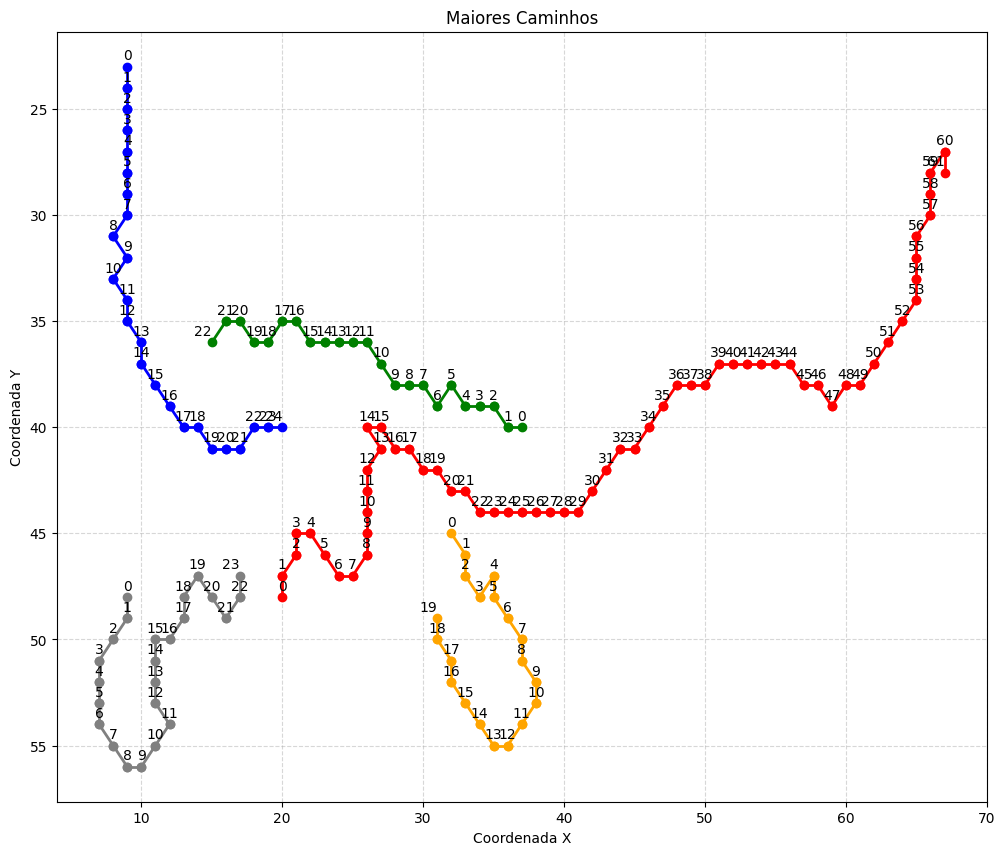

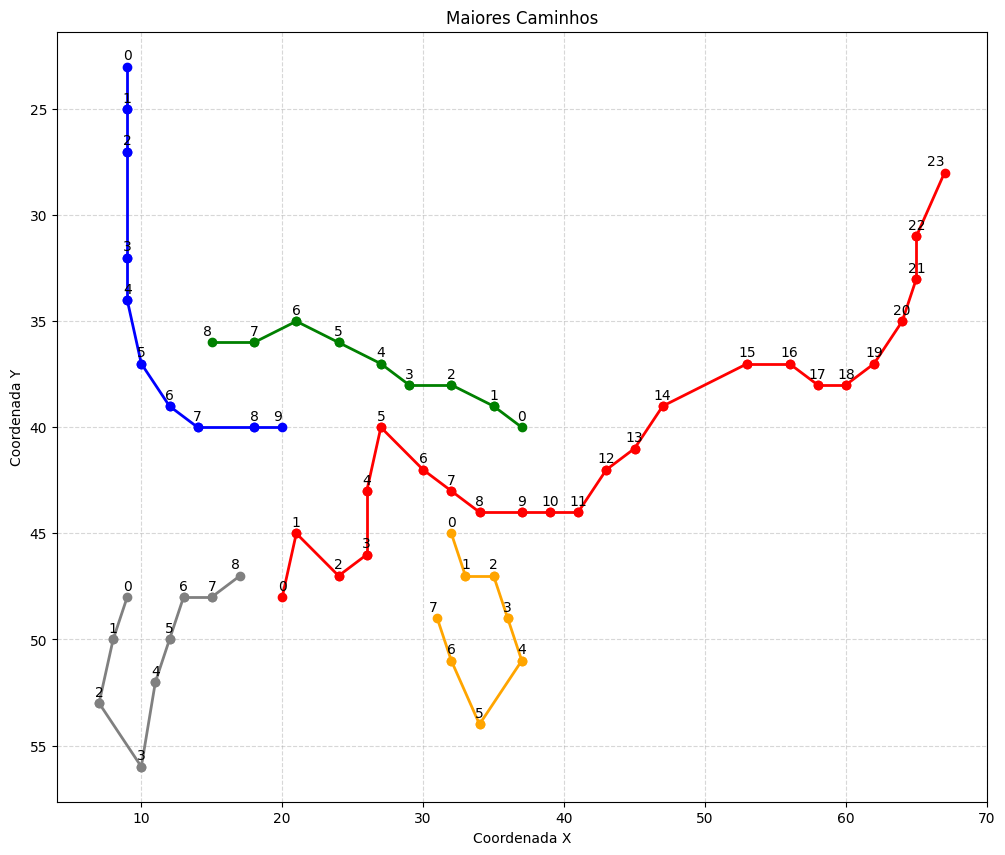

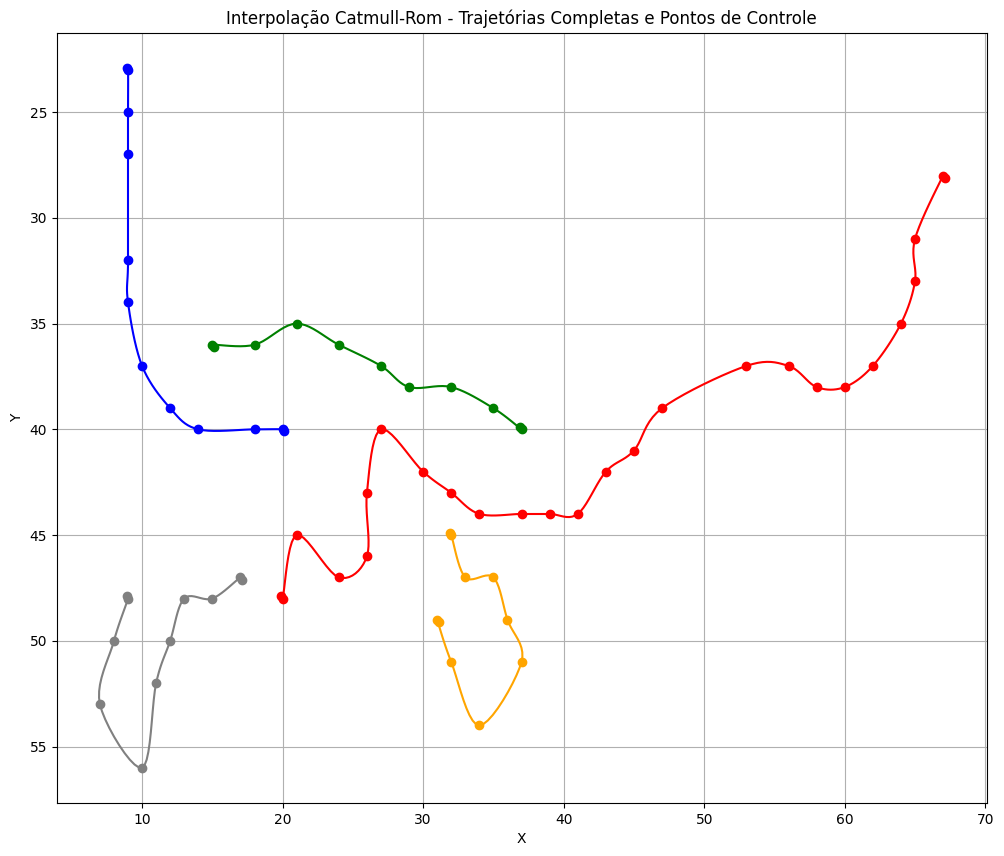

In [6]:
highlight_components(results[0][2].nose_dict, results[0][4].dic_main_nose_cc)
plot_logest_path(results[0][2].nose_dict, results[0][6].longest_path_nose, results[0][5].nodes_nose)
plot_logest_path(results[0][2].nose_dict, results[0][6].new_longest_path_nose, results[0][5].nodes_nose)
plot_splines(results[0][7].all_X_nose, results[0][7].all_Y_nose, results[0][7].all_control_x_nose, results[0][7].all_control_y_nose)


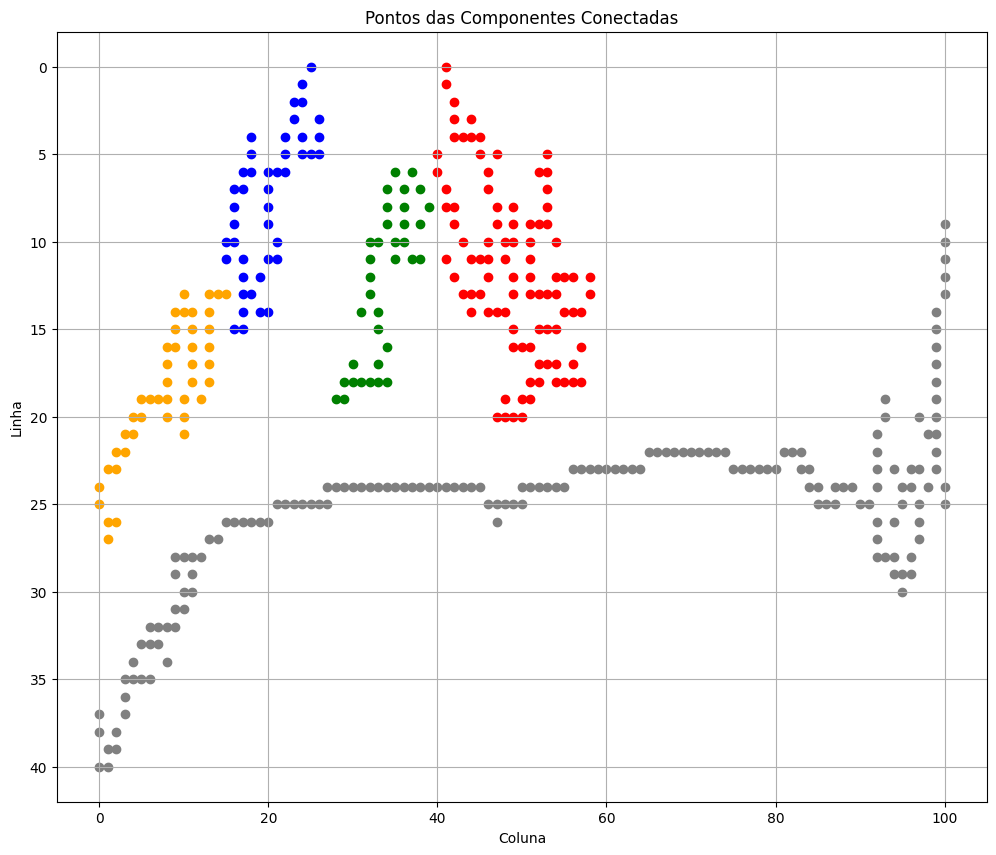

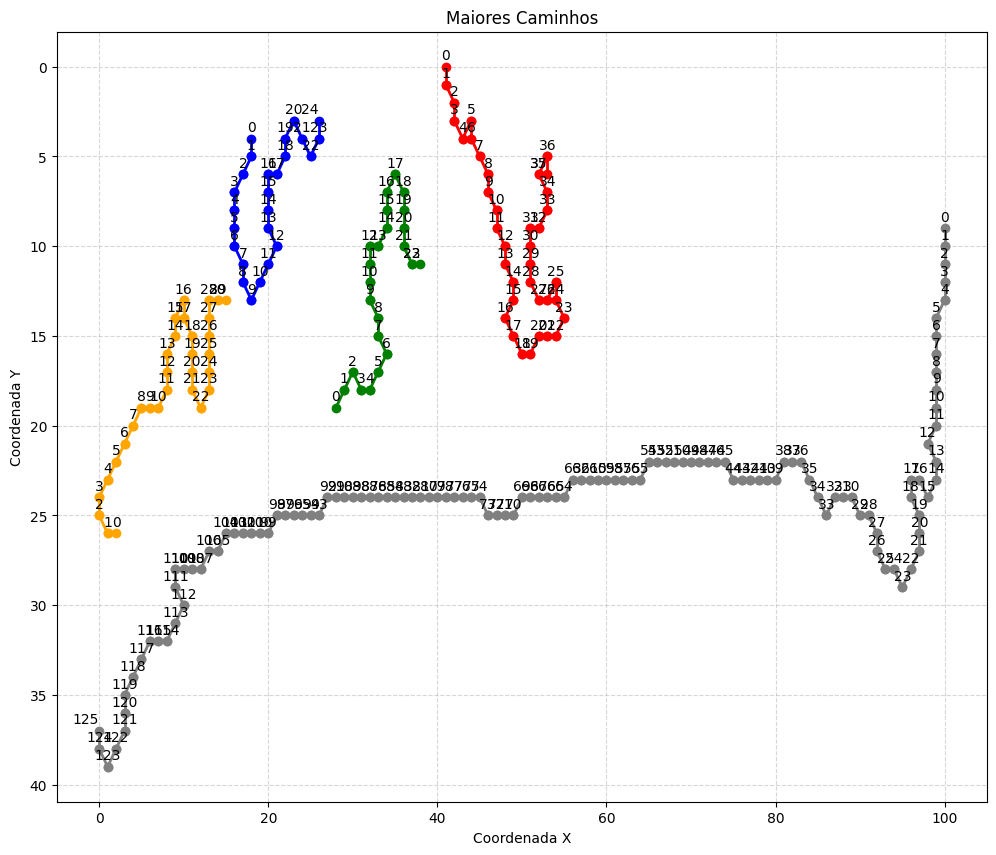

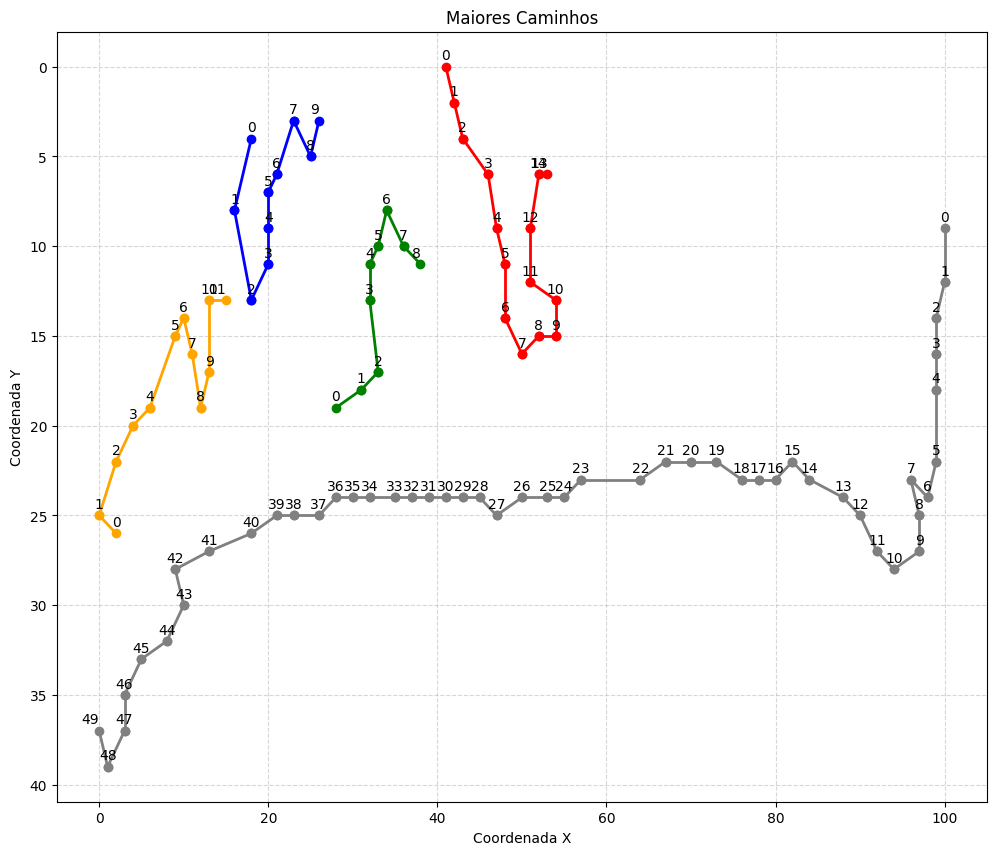

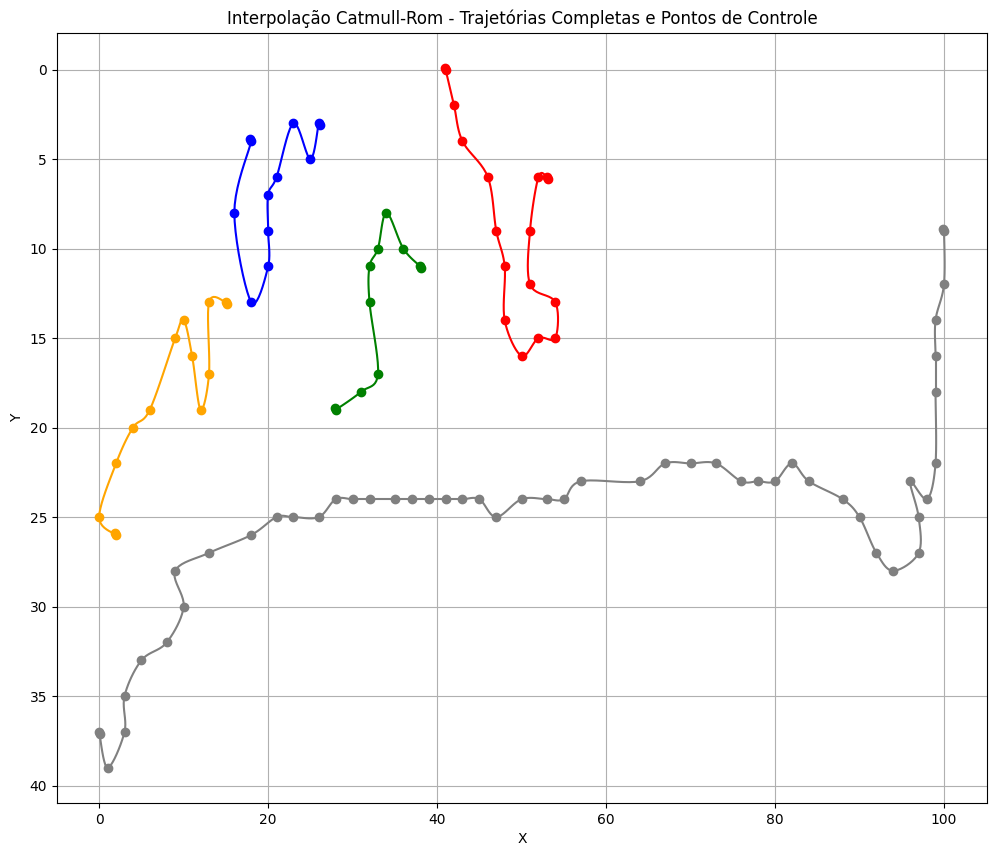

In [7]:

highlight_components(results[0][2].mouth_dict, results[0][4].dic_main_mouth_cc)
plot_logest_path(results[0][2].mouth_dict, results[0][6].longest_path_mouth, results[0][5].nodes_mouth)
plot_logest_path(results[0][2].mouth_dict, results[0][6].new_longest_path_mouth, results[0][5].nodes_mouth)
plot_splines(results[0][7].all_X_mouth, results[0][7].all_Y_mouth, results[0][7].all_control_x_mouth, results[0][7].all_control_y_mouth)